In [1]:
import sys
sys.path.append('..')  # allow this notebook to find equal-level directories

import os
import pyomo.environ as oe
import pandas as pd
from pyomo.opt import SolverFactory, SolverManagerFactory
from amplpy import AMPL, Environment

from util.subproblem_model_costobjective import build_subproblem_model
from util.subproblem_dataloader import DataLoader
from util.subproblem_solver_ipopt import SolveAndParse
from util.gjh_wrapper import gjh_solve, make_df
from vis.acres_bars import acres_bars
from vis.zL_bars import zL_bars

%pylab inline
from datetime import datetime

Populating the interactive namespace from numpy and matplotlib


In [2]:
baseexppath = '/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/'
projectpath = os.path.join(baseexppath, 'ampl/OptEfficiencySubProblem/')
amplappdir = os.path.join(baseexppath, 'ampl/amplide.macosx64/')
ampl = AMPL(Environment(amplappdir))

## Load data for each set, parameter, etc. to define a problem instance

In [3]:
data = DataLoader(save2file=False)

# ---- tau target load ----
for k in data.tau:
    data.tau[k] = 12
    print(data.tau[k])
    taustr = str(round(data.tau[k], 1))

# ---- Solver name ----
localsolver = True
solvername = 'ipopt'
# solvername = 'minos'

12
12
12


## Create concrete problem instance using the separately defined optimization model

In [4]:
# Note that there is no need to call create_instance on a ConcreteModel
mdl = build_subproblem_model(pltnts=data.PLTNTS,
                             lrsegs=data.LRSEGS,
                             bmps=data.BMPS,
                             bmpgrps=data.BMPGRPS,
                             bmpgrping=data.BMPGRPING,
                             loadsrcs=data.LOADSRCS,
                             bmpsrclinks=data.BMPSRCLINKS,
                             bmpgrpsrclinks=data.BMPGRPSRCLINKS,
                             c=data.c,
                             e=data.E,
                             tau=data.tau,
                             phi=data.phi,
                             t=data.T)

In [5]:
# Print the target load reduction values
for l in mdl.LRSEGS:
    for p in mdl.PLTNTS:
        print('%s: %d' % (mdl.tau[l,p], mdl.tau[l,p].value))

tau[N51133RL0_6450_0000,P]: 12
tau[N51133RL0_6450_0000,S]: 12
tau[N51133RL0_6450_0000,N]: 12


## Solve problem instance

In [6]:
myobj = SolveAndParse(instance=mdl, data=data, localsolver=localsolver, solvername=solvername)
merged_df = myobj.solve()
print('\nObjective is: %d' % oe.value(mdl.Total_Cost))

Solver log file: 'logfile_loadobjective.log'
Solver solution file: '/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/ampl/OptEfficiencySubProblem/jnotebooks/tmpcu6s0639.pyomo.sol'
Solver problem files: ('/Users/Danny/Desktop/CATEGORIES/CAREER_MANAGEMENT/CRC_ResearchScientist_Optimization/Optimization_Tool/2_ExperimentFolder/ampl/OptEfficiencySubProblem/jnotebooks/tmpcu6s0639.pyomo.nl',)
Ipopt 3.12.8: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.8, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt document

* jac_g [    1,  781] =  1.5150555053584499e-03 v  ~  1.5148771126405336e-03  [ 1.784e-07]
* jac_g [    1,  782] =  4.7809201568979327e-04 v  ~  4.7819526116654743e-04  [ 1.032e-07]
* jac_g [    1,  791] =  2.3904600784489664e-04 v  ~  2.3945290195115376e-04  [ 4.069e-07]
* jac_g [    1,  795] =  1.9856539684565142e-07 v  ~  3.5527136788005009e-07  [ 1.567e-07]
* jac_g [    1,  799] =  6.3791810751934739e-04 v  ~  6.3806737671256997e-04  [ 1.493e-07]
* jac_g [    1,  800] =  2.0130190134307085e-04 v  ~  2.0179413695586845e-04  [ 4.922e-07]
* jac_g [    1,  804] =  1.6721296576475911e-07 v  ~  0.0000000000000000e+00  [ 1.672e-07]
* jac_g [    1,  818] =  4.4034790918796743e-04 v  ~  4.4053649617126212e-04  [ 1.886e-07]
* jac_g [    1,  826] =  8.3726751611914335e-04 v  ~  8.3737461409327807e-04  [ 1.071e-07]
* jac_g [    1,  827] =  2.6420874551278051e-04 v  ~  2.6432189770275727e-04  [ 1.132e-07]
* jac_g [    1,  831] =  2.1946701756624631e-07 v  ~  3.5527136788005009e-07  [ 1.358e-07]

  16  3.0504797e+06 2.68e+00 6.98e+02  -1.0 1.60e+03    -  5.56e-03 5.04e-01h  1
  17  3.1274749e+06 2.34e+00 8.06e+02  -1.0 5.83e+03    -  9.47e-03 1.27e-01h  1
  18  3.5317378e+06 8.45e-01 1.03e+03  -1.0 3.63e+03    -  4.46e-02 6.40e-01h  1
  19  3.5437563e+06 7.85e-01 9.73e+02  -1.0 1.47e+03    -  5.27e-02 7.10e-02h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  20  3.5853916e+06 3.35e-01 9.55e+02  -1.0 2.48e+03    -  9.94e-02 5.76e-01h  1
  21  3.5860962e+06 2.98e-01 9.16e+02  -1.0 1.12e+03    -  3.91e-02 1.10e-01h  1
  22  3.5630136e+06 2.10e-01 8.18e+02  -1.0 2.09e+03    -  8.27e-02 2.96e-01f  1
  23  3.5251600e+06 1.80e-01 7.89e+02  -1.0 3.47e+03    -  1.44e-02 1.42e-01f  1
  24  3.4071595e+06 1.11e-01 7.34e+02  -1.0 3.30e+03    -  5.61e-02 3.63e-01f  1
  25  3.2704228e+06 6.68e-02 8.31e+02  -1.0 7.56e+03    -  3.23e-02 1.26e-01f  1
  26  3.0461451e+06 5.97e-03 5.47e+02  -1.0 2.92e+03    -  3.59e-01 3.76e-01f  1
  27  3.0137940e+06 3.93e-03

In [8]:
output_file_name = 'ipopt_output_file'  # defined in the ipopt.opt file
#output_file_name = 'test_ipopt_output_file.txt'

dict_of_iterates = myobj.parse_output_file(output_file_name)

iterate #: 0
                                                        outputname varname  \
componentindex varindex                                                      
[    1]        [AdvancedGI,N51133RL0_6450_0000,nch]         curr_x       x   
[    2]        [AdvancedGI,N51133RL0_6450_0000,ntg]         curr_x       x   
[    3]        [AgStormEff,N51133RL0_6450_0000,fnp]         curr_x       x   
[    4]        [BarnRunoffCont,N51133RL0_6450_0000,fnp]     curr_x       x   
[    5]        [BioRetNoUDAB,N51133RL0_6450_0000,nch]       curr_x       x   

                                                                           value  
componentindex varindex                                                           
[    1]        [AdvancedGI,N51133RL0_6450_0000,nch]       9.9999900000000003e-03  
[    2]        [AdvancedGI,N51133RL0_6450_0000,ntg]       9.9999900000000003e-03  
[    3]        [AgStormEff,N51133RL0_6450_0000,fnp]       9.9999900000000003e-03  
[    4]        [BarnRunof

iterate #: 13
                                                        outputname varname  \
componentindex varindex                                                      
[    1]        [AdvancedGI,N51133RL0_6450_0000,nch]         curr_x       x   
[    2]        [AdvancedGI,N51133RL0_6450_0000,ntg]         curr_x       x   
[    3]        [AgStormEff,N51133RL0_6450_0000,fnp]         curr_x       x   
[    4]        [BarnRunoffCont,N51133RL0_6450_0000,fnp]     curr_x       x   
[    5]        [BioRetNoUDAB,N51133RL0_6450_0000,nch]       curr_x       x   

                                                                           value  
componentindex varindex                                                           
[    1]        [AdvancedGI,N51133RL0_6450_0000,nch]       8.6798695207551152e-02  
[    2]        [AdvancedGI,N51133RL0_6450_0000,ntg]       5.3932551355461544e-02  
[    3]        [AgStormEff,N51133RL0_6450_0000,fnp]       8.4876053000907444e-03  
[    4]        [BarnRuno

iterate #: 24
                                                        outputname varname  \
componentindex varindex                                                      
[    1]        [AdvancedGI,N51133RL0_6450_0000,nch]         curr_x       x   
[    2]        [AdvancedGI,N51133RL0_6450_0000,ntg]         curr_x       x   
[    3]        [AgStormEff,N51133RL0_6450_0000,fnp]         curr_x       x   
[    4]        [BarnRunoffCont,N51133RL0_6450_0000,fnp]     curr_x       x   
[    5]        [BioRetNoUDAB,N51133RL0_6450_0000,nch]       curr_x       x   

                                                                           value  
componentindex varindex                                                           
[    1]        [AdvancedGI,N51133RL0_6450_0000,nch]       5.7821901925641406e-01  
[    2]        [AdvancedGI,N51133RL0_6450_0000,ntg]       4.5706027049227056e-02  
[    3]        [AgStormEff,N51133RL0_6450_0000,fnp]       8.4942844630551961e-03  
[    4]        [BarnRuno

                                                        outputname varname  \
componentindex varindex                                                      
[    1]        [AdvancedGI,N51133RL0_6450_0000,nch]         curr_x       x   
[    2]        [AdvancedGI,N51133RL0_6450_0000,ntg]         curr_x       x   
[    3]        [AgStormEff,N51133RL0_6450_0000,fnp]         curr_x       x   
[    4]        [BarnRunoffCont,N51133RL0_6450_0000,fnp]     curr_x       x   
[    5]        [BioRetNoUDAB,N51133RL0_6450_0000,nch]       curr_x       x   

                                                                           value  
componentindex varindex                                                           
[    1]        [AdvancedGI,N51133RL0_6450_0000,nch]       1.2354199161996283e-01  
[    2]        [AdvancedGI,N51133RL0_6450_0000,ntg]       2.7043491837997369e-02  
[    3]        [AgStormEff,N51133RL0_6450_0000,fnp]       8.4943880316993032e-03  
[    4]        [BarnRunoffCont,N51133R

iterate #: 49
                                                        outputname varname  \
componentindex varindex                                                      
[    1]        [AdvancedGI,N51133RL0_6450_0000,nch]         curr_x       x   
[    2]        [AdvancedGI,N51133RL0_6450_0000,ntg]         curr_x       x   
[    3]        [AgStormEff,N51133RL0_6450_0000,fnp]         curr_x       x   
[    4]        [BarnRunoffCont,N51133RL0_6450_0000,fnp]     curr_x       x   
[    5]        [BioRetNoUDAB,N51133RL0_6450_0000,nch]       curr_x       x   

                                                                           value  
componentindex varindex                                                           
[    1]        [AdvancedGI,N51133RL0_6450_0000,nch]      -6.9137656157041452e-09  
[    2]        [AdvancedGI,N51133RL0_6450_0000,ntg]      -9.3235086175850361e-09  
[    3]        [AgStormEff,N51133RL0_6450_0000,fnp]      -9.7826247784293317e-09  
[    4]        [BarnRuno

In [33]:
varvals = {}
varvals[0] = []
for ii in dict_of_iterates.keys():
    df = dict_of_iterates[ii]
    varvals[0].append(float(df.loc[(df.outputname=='curr_x') &
                                   (df.varname=='x') & 
                                   (df.index.get_level_values('varindex')=='[CoverCropTradRED,N51133RL0_6450_0000,gom]')]['value'][0]))
print(varvals[0])

varvals[1] = []
for ii in dict_of_iterates.keys():
    df = dict_of_iterates[ii]
    varvals[1].append(float(df.loc[(df.outputname=='curr_x') &
                                   (df.varname=='x') & 
                                   (df.index.get_level_values('varindex')=='[UrbanNMPlanHR,N51133RL0_6450_0000,ntg]')]['value'][0]))
print(varvals[1])

[0.00999999, 0.010948548030099361, 0.011018901813272539, 0.01218328862445961, 0.015934967267615147, 0.02519453404387508, 0.0477795542108925, 40.396337839128684, 219.3013353020433, 748.7404083090701, 1061.6288936788803, 1077.9574460144534, 1078.3658450186024, 1519.8508489113053, 1584.9966287810373, 1586.1516950657842, 2166.7634705764713, 2235.8480129938857, 2542.356093236449, 2555.816306131682, 2647.2456306559193, 2655.4894742061188, 2662.6296316022035, 2628.970550673543, 2553.805759199413, 2568.690708799072, 2564.4693609304054, 2583.1423036133556, 2642.328432477114, 2659.839331819505, 2727.800767414479, 2762.970174218664, 2967.4876842328435, 3006.572112672456, 3108.5249507818617, 3104.56304553424, 3076.864616784187, 3074.7005527776387, 3052.544521825044, 3051.719434018204, 3049.486728571401, 3098.2332978498325, 3098.340331611357, 3098.3392887608265, 3098.3401831417154, 3098.3386488150413, 3098.3377714395433, 3098.3376272894734, 3098.3366604873822, 3098.336626555826, 3098.3366265568134,

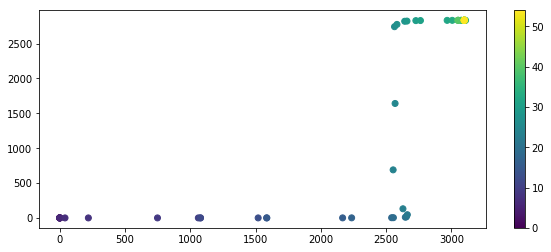

In [37]:
# Make Figure
fig = plt.figure(figsize=(10, 4))
rects = plt.scatter(varvals[0], varvals[1], c=range(len(varvals[1])))
ax = plt.gca()
plt.colorbar()

## Visualize

In [ ]:
for l in mdl.LRSEGS:
    for p in mdl.PLTNTS:
        print('%s: %d' % (mdl.TargetPercentReduction[l,p], oe.value(mdl.TargetPercentReduction[l,p].body)))

In [ ]:
# ---- Make zL Figure ----
filenamestr = ''.join(['output/costobj_zL_tau', taustr, '_', solvername, '_',
                       datetime.now().strftime('%Y-%m-%d_%H%M%S'),
                       '.png'])
savefilepathandname = os.path.join(projectpath, filenamestr)

zL_bars(df=merged_df, instance=mdl,
        savefig=True, savefilepathandname=savefilepathandname)

In [ ]:
# ---- Acres Figure ----
sorteddf_byacres = merged_df.sort_values(by='acres')

filenamestr = ''.join(['output/costobj_x_tau', taustr, '_', solvername, '_',
                       datetime.now().strftime('%Y-%m-%d_%H%M%S'), '.png'])
savefilepathandname = os.path.join(projectpath, filenamestr)

objstr = ''.join(['Objective is: ', str(mdl.Total_Cost())])
titlestr = '\n'.join([objstr, 'labels are (cost per unit, total bmp instance cost)'])

acres_bars(df=sorteddf_byacres, instance=mdl, titlestr=titlestr,
           savefig=True, savefilepathandname=savefilepathandname)

## Gradient, Jacobian, Hessian

In [ ]:
gjh_filename, g = gjh_solve(instance=mdl,
                            keepfiles=True,
                            amplenv=ampl,
                            basegjhpath=os.getcwd())

g_df = make_df(instance=mdl, filterbydf=merged_df, g=g)

g_df = sorteddf_byacres.merge(g_df, how='left',
                              on=['bmpshortname', 'landriversegment', 'loadsource'],
                              sort=False)

In [ ]:
# ---- Make gradient Figure ----
# g_df_filtered = g_df.loc[abs(g_df['g'])>0.001,:].copy()
g_df_filtered = g_df
# sorteddf = g_df_filtered.sort_values(by='g')
# sorteddf_byacres

# sorteddf_byacres
# g_df = g_df.merge(sorteddf_byacres, how='right',
#                on=['bmpshortname', 'landriversegment', 'loadsource'])

keystrs = [str([x, y]) for x, y in zip(g_df_filtered['bmpshortname'], g_df_filtered['loadsource'])]
# Make Figure
fig = plt.figure(figsize=(10, 4))
rects = plt.barh(y=keystrs, width=g_df_filtered['g'])
ax = plt.gca()

ax.set_position([0.3,0.1,0.5,0.8])


filenamestr = ''.join(['output/costobj_g_tau', taustr, '_', solvername, '_',
                       datetime.now().strftime('%Y-%m-%d_%H%M%S'),
                       '.png'])
plt.savefig(os.path.join(projectpath, filenamestr))

In [ ]:
# #Read number of variables and constraints
# nl_file = open(''.join([filecode, '.pyomo.nl']),'r')
# nl_lines = nl_file.readlines()
# num_variables = int(nl_lines[1].split(' ')[1])
# num_constraints = int(nl_lines[1].split(' ')[2])

In [ ]:
for v in mdl.component_objects(oe.Var, active=True):
    print ("Variable component object",v)
    i=0
    for index in v:
        try:
            x_value = oe.value(v[index])
            i+=1
            try:
                print (i,"   ", index, v[index].value, g[i])
            except:
                print (i,"   ", index, v[index].value)
        except:
            pass

In [ ]:
# #Read number of variables and constraints
# gjh_file = open(''.join([filecode, '.pyomo.gjh']),'r')
# gjh_lines = gjh_file.readlines()

In [ ]:
# print(gjh_lines[1])

In [ ]:
# num_variables = int(gjh_lines[1].split(' ')[1])
# num_constraints = int(gjh_lines[1].split(' ')[2])

In [ ]:
# #Read gjh output file
# gjh = oe.AbstractModel()
# # gjh.n_var = oe.Set(initialize=range(1,num_variables+1))
# # gjh.n_cons = oe.Set(initialize=range(1,num_constraints+1))
# # gjh.g = oe.Param(gjh.n_var, default=0)
# # gjh.J = oe.Param(gjh.n_cons, gjh.n_var, default=0)
# # gjh.H = oe.Param(gjh.n_var, gjh.n_var, default=0)
# # os.rename(''.join([filecode, '.pyomo.gjh']), ''.join([filecode, '.pyomo.gjh.dat']))
# gjh_ins = gjh.create_instance(''.join([filecode, '.pyomo.gjh.dat']))

# #Print
# for i in gjh_ins.n_var:
#     print(gjh_ins.g[i])